In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker
from scipy import stats
import itertools

data_dir = path.join("/home/katelyn/Documents/COSC490/Stemming/Data","trec")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]

MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

## Preparing Data

In [20]:
df_list = list()

for i in range(1,9):
    df = pd.read_csv(path.join(data_dir,f"map_TREC-{i}"), sep="\\s+")
    df["collection"] = f"TREC-{i}"
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)

## MAP

In [9]:
for i in range (1,9):
    target = data_avg[data_avg["collection"] == f"TREC-{i}"]
    display(target)

,stemmer,qid,map,collection
50,paiceHusk,all,0.2428,TREC-1
101,krovetz,all,0.2464,TREC-1
152,sStripping,all,0.2258,TREC-1
203,porter2,all,0.2380,TREC-1
254,lovins,all,0.2279,TREC-1
305,wikt,all,0.2449,TREC-1
356,none,all,0.2029,TREC-1


,stemmer,qid,map,collection
407,paiceHusk,all,0.1987,TREC-2
458,krovetz,all,0.2132,TREC-2
509,sStripping,all,0.2006,TREC-2
560,porter2,all,0.2145,TREC-2
611,lovins,all,0.2030,TREC-2
662,wikt,all,0.2131,TREC-2
713,none,all,0.1879,TREC-2


,stemmer,qid,map,collection
764,paiceHusk,all,0.2737,TREC-3
815,krovetz,all,0.2718,TREC-3
866,sStripping,all,0.2538,TREC-3
917,porter2,all,0.2892,TREC-3
968,lovins,all,0.2635,TREC-3
1019,wikt,all,0.2862,TREC-3
1070,none,all,0.2233,TREC-3


,stemmer,qid,map,collection
1121,paiceHusk,all,0.1719,TREC-4
1172,krovetz,all,0.1745,TREC-4
1223,sStripping,all,0.1781,TREC-4
1274,porter2,all,0.1773,TREC-4
1325,lovins,all,0.1757,TREC-4
1376,wikt,all,0.1679,TREC-4
1427,none,all,0.1660,TREC-4


,stemmer,qid,map,collection
1478,paiceHusk,all,0.1475,TREC-5
1529,krovetz,all,0.1615,TREC-5
1580,sStripping,all,0.1726,TREC-5
1631,porter2,all,0.1609,TREC-5
1682,lovins,all,0.1403,TREC-5
1733,wikt,all,0.1543,TREC-5
1784,none,all,0.1394,TREC-5


,stemmer,qid,map,collection
1835,paiceHusk,all,0.2215,TREC-6
1886,krovetz,all,0.2469,TREC-6
1937,sStripping,all,0.2358,TREC-6
1988,porter2,all,0.2372,TREC-6
2039,lovins,all,0.2018,TREC-6
2090,wikt,all,0.2207,TREC-6
2141,none,all,0.1863,TREC-6


,stemmer,qid,map,collection
2192,paiceHusk,all,0.1967,TREC-7
2243,krovetz,all,0.2019,TREC-7
2294,sStripping,all,0.1945,TREC-7
2345,porter2,all,0.1991,TREC-7
2396,lovins,all,0.1812,TREC-7
2447,wikt,all,0.2029,TREC-7
2498,none,all,0.1878,TREC-7


,stemmer,qid,map,collection
2549,paiceHusk,all,0.2535,TREC-8
2600,krovetz,all,0.2523,TREC-8
2651,sStripping,all,0.2333,TREC-8
2702,porter2,all,0.2587,TREC-8
2753,lovins,all,0.2360,TREC-8
2804,wikt,all,0.2309,TREC-8
2855,none,all,0.2159,TREC-8


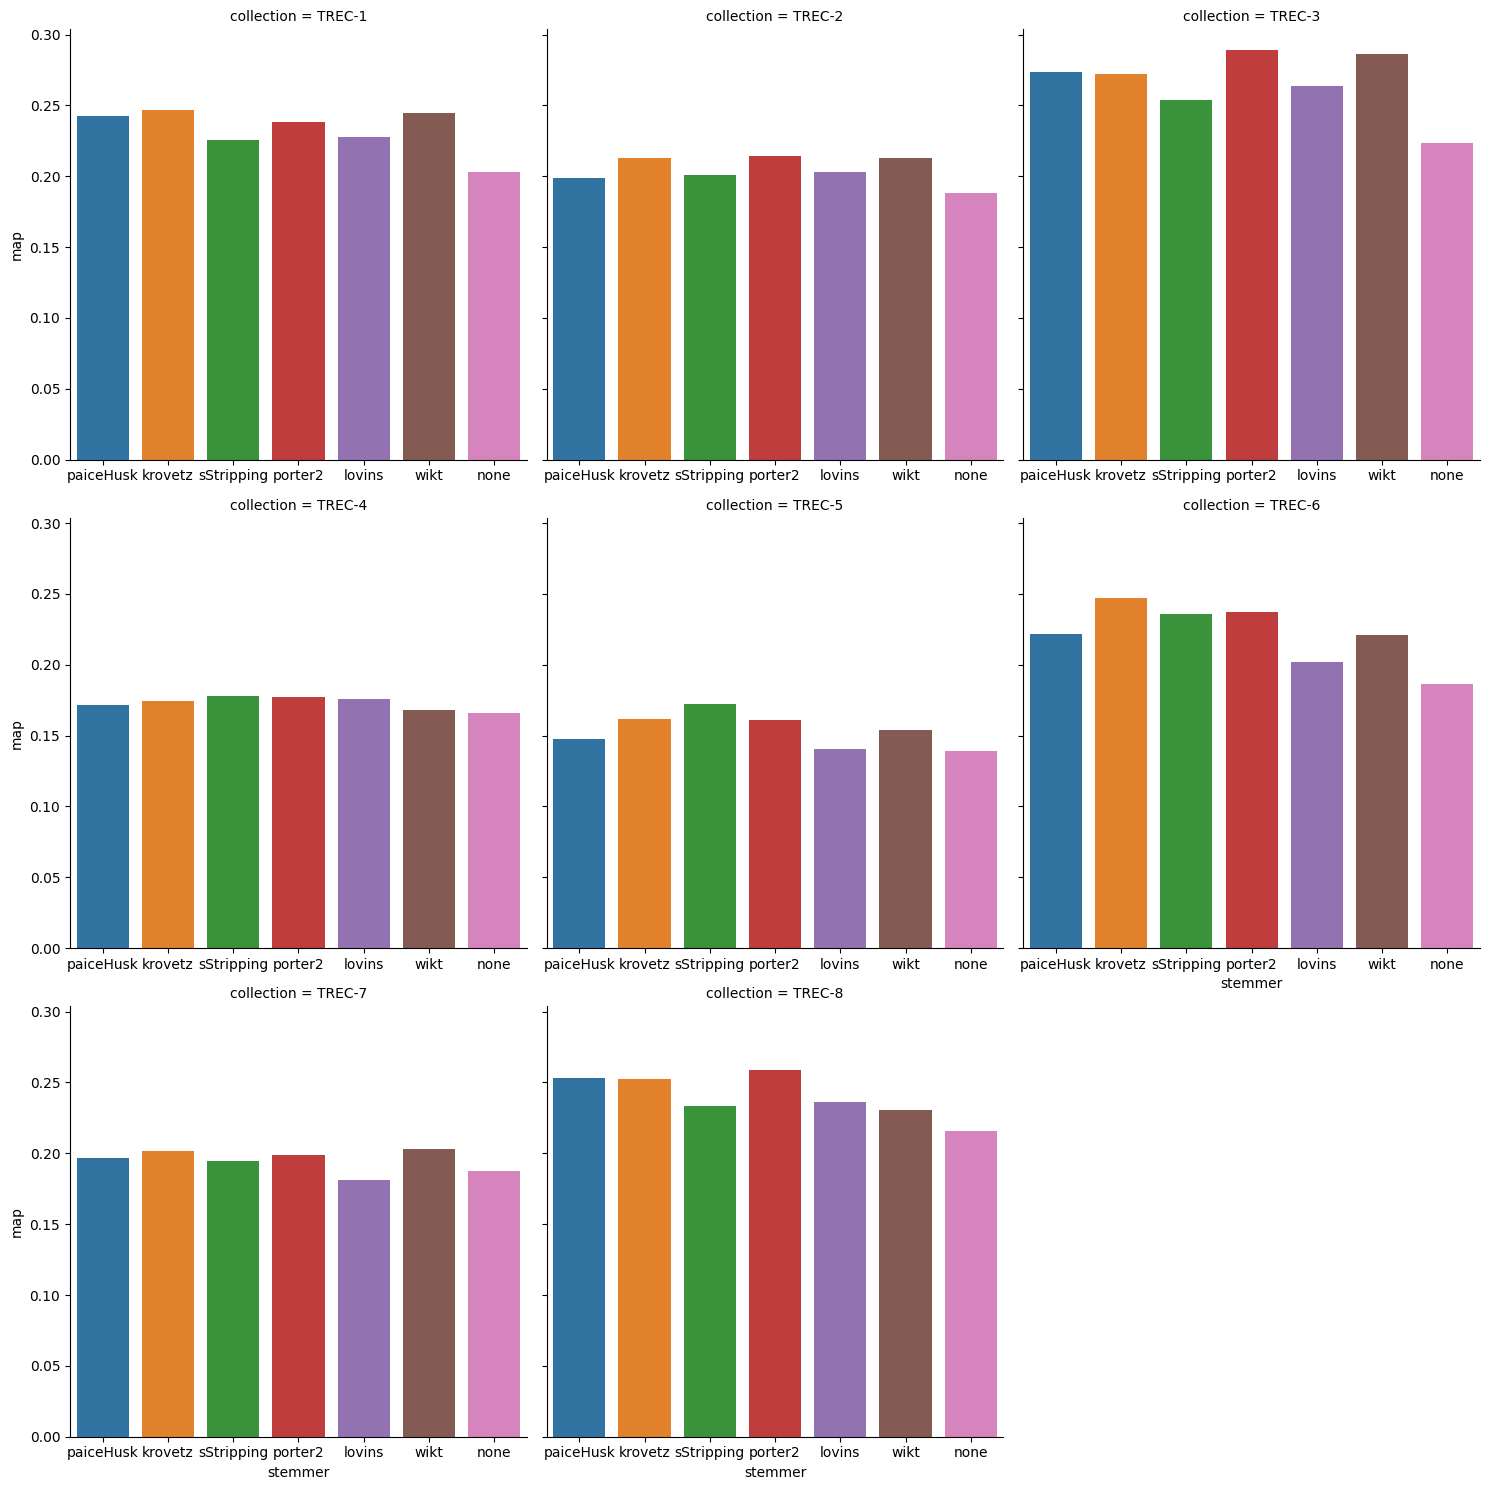

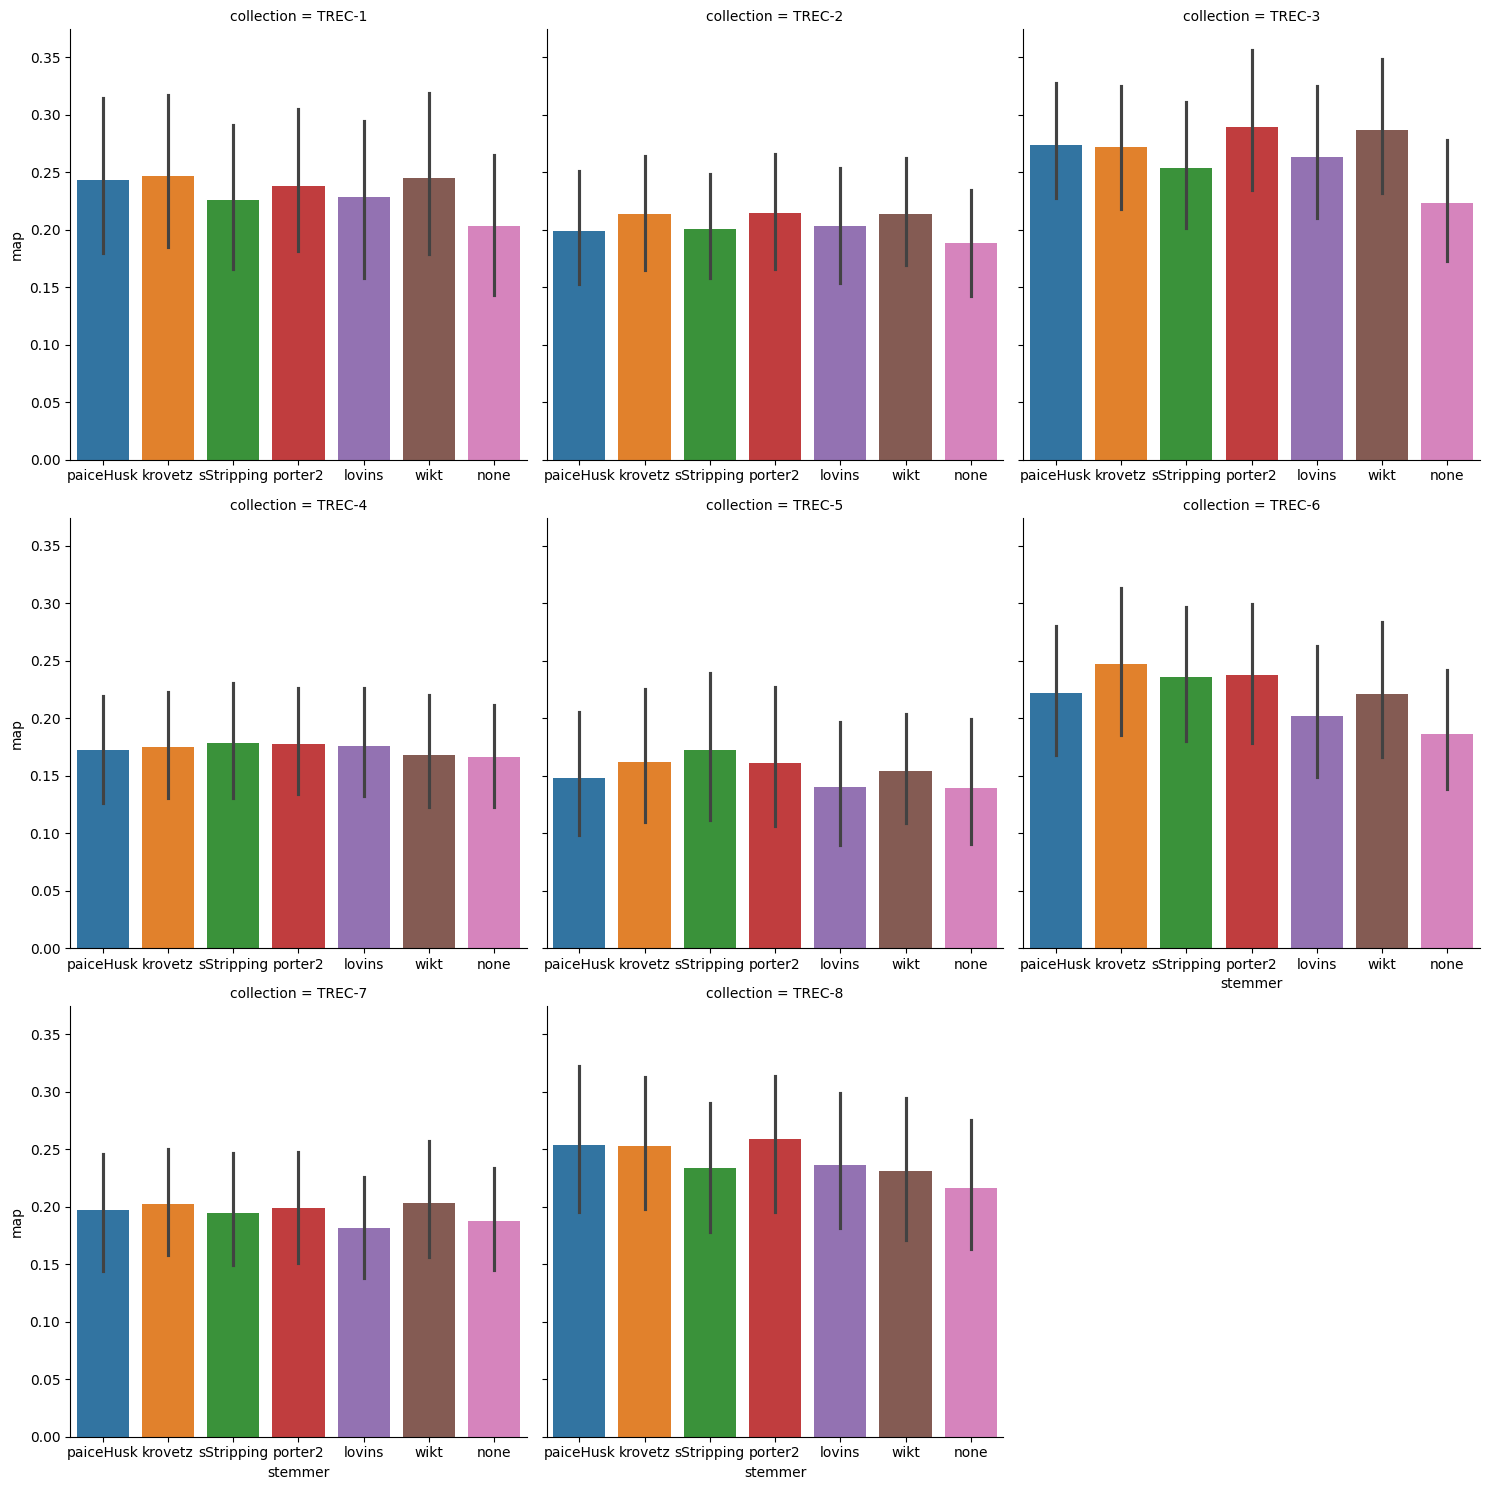

In [6]:
axes = sns.catplot(data=data_avg, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
plt.show()
axes = sns.catplot(data=data, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
plt.show()

In [15]:
target = data[data["collection"] == "TREC-4"]
import scipy.stats
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
stats.ttest_rel(s,t)

TtestResult(statistic=1.6711578426486795, pvalue=0.10106621047471313, df=49)

In [24]:
target = data_avg[data_avg["stemmer"] != "none"]
target = target[target["stemmer"] != "wikt"]
averages = list()
for stemmer in labels[:-2]:
    fmeasures = np.loadtxt(f"/home/katelyn/Documents/COSC490/Stemming/Data/wikt/{stemmer}_cluster_fmeasures.csv")
    averages.append(fmeasures.mean())
fmeasures = list()
for i in range (1,9):
    fmeasures.extend(averages)
target = target.assign(fmeasure=fmeasures)

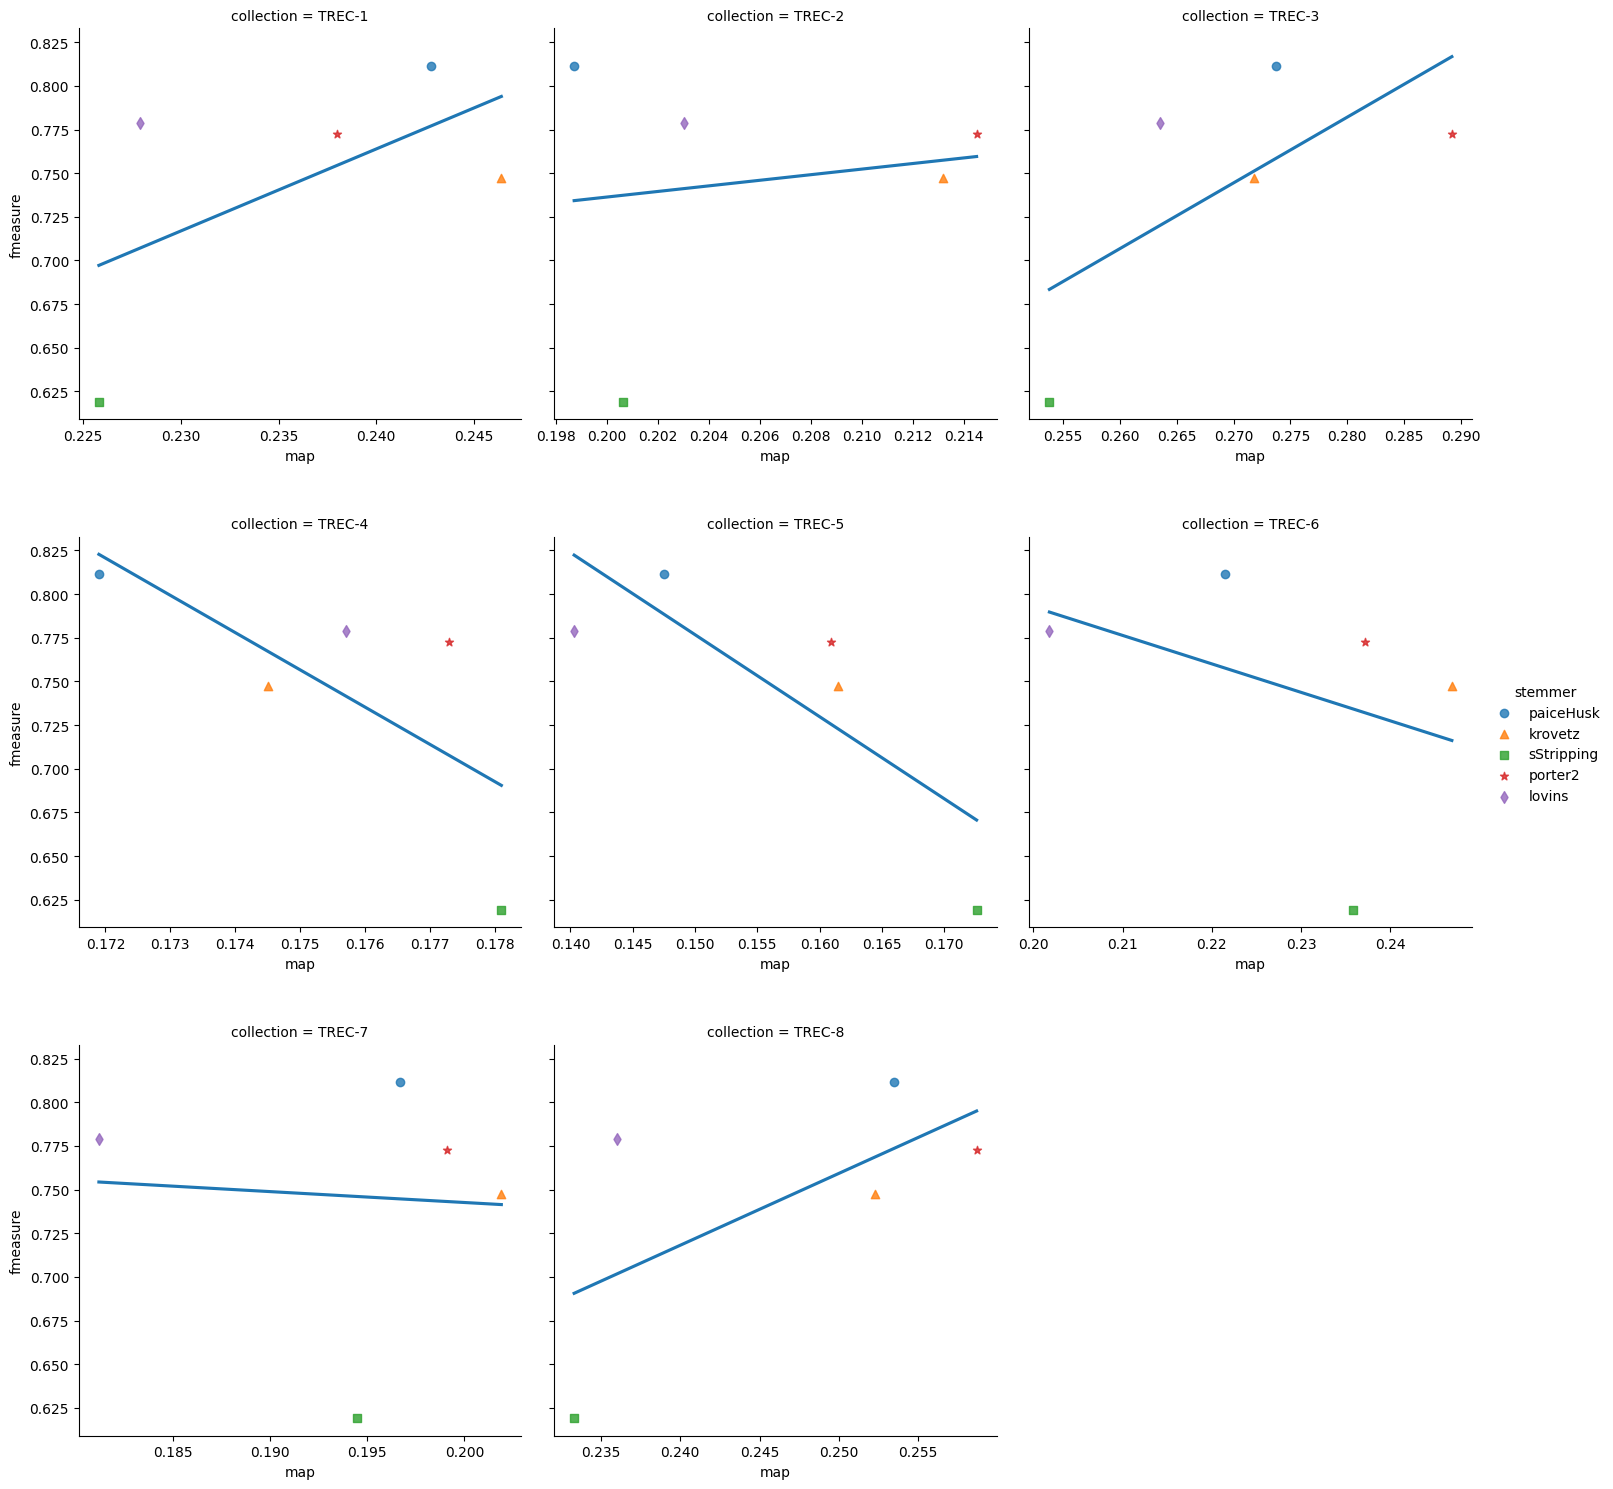

In [25]:
graph = sns.lmplot(target, x="map", y="fmeasure", hue="stemmer", markers=MARKERS[:-2], col="collection", col_wrap=3, facet_kws={"sharex": False}, fit_reg=False)

for collection, ax in zip(np.unique(data_avg["collection"]), graph.axes):
    target_data = target[target["collection"] == collection]
    sns.regplot(target_data, x="map", y="fmeasure", scatter=False, ci=None, ax=ax)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [26]:
print("size pearson-R p-value")
for i in range (1,9):
    x = target[target["collection"] == f"TREC-{i}"]["map"].to_numpy()
    y = target[target["collection"] == f"TREC-{i}"]["fmeasure"].to_numpy()
    print(f"{i} {stats.pearsonr(x,y).statistic:.3f} {stats.pearsonr(x,y).pvalue:.3f}")

size pearson-R p-value
1 0.571 0.314
2 0.158 0.800
3 0.664 0.221
4 -0.702 0.186
5 -0.803 0.102
6 -0.384 0.523
7 -0.067 0.914
8 0.627 0.258
